# Assignment: Exploratory Data Analysis


**Q1.** To compute the sample mean of a variable $X$:
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

In [ ]:

#Q4:
# Yes, it works for the median. Median is a positional stat, so as long as g(x) is non-decreasing, the order doesn't change. The middle value stays
# the middle value. median(g(X)) = g(median(X)).
#
# Yes this will work for any quantile since rank is preserved
#
# IQR and Range will not since its distance
# Non-linear transformations stretch or squash distances, so the
# transformed distance isn't the same as the function of the distance.

# Q5:
# No
# This only works if g() is a linear function

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

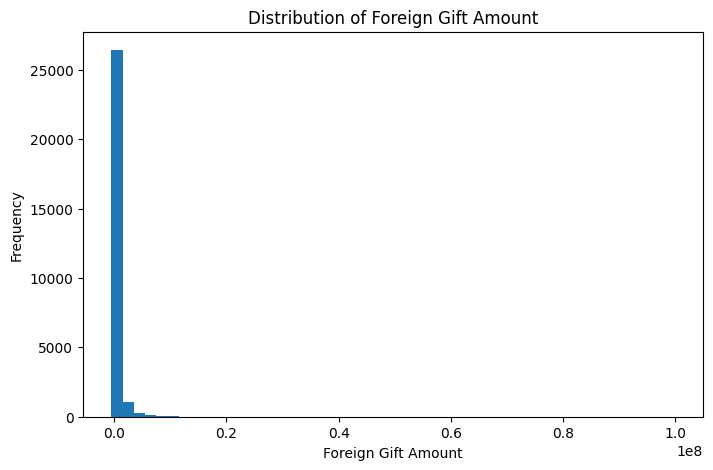

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64
Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64


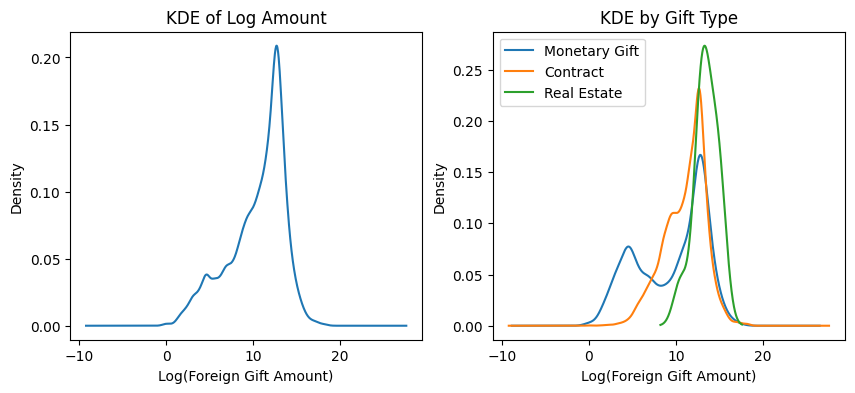


Top 15 by count:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64

Top 15 by amount:
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gi

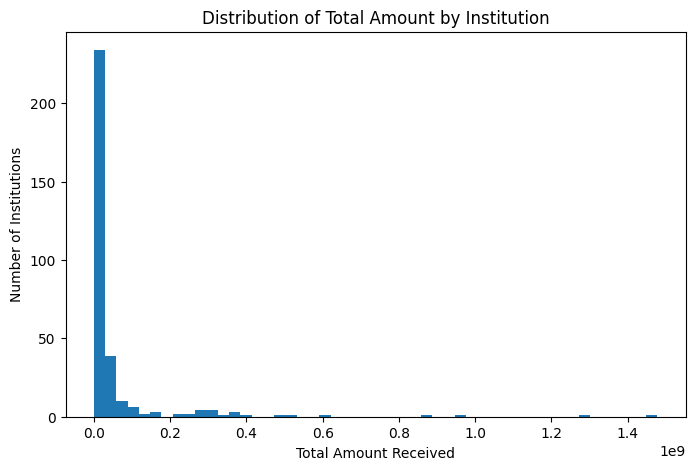


Top giftors:
Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Claude Sonnet 4.5 Used to Clean up and Troubleshoot
# 1. Load dataset
df = pd.read_csv('ForeignGifts_edu.csv')

# 2. Histogram of Foreign Gift Amount
plt.figure(figsize=(8, 5))
plt.hist(df['Foreign Gift Amount'], bins=50)
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Foreign Gift Amount')
plt.show()

print(df['Foreign Gift Amount'].describe())
# Right-skewed, mean=$588k, median=$95k. Most gifts small, few very large ones

# 3. Gift Type histogram
print(df['Gift Type'].value_counts(normalize=True))
# Contracts: 61%, Monetary: 39%, Real Estate: 0.04%

# 4. KDE plots
df_pos = df[df['Foreign Gift Amount'] > 0].copy()
df_pos['log_amount'] = np.log(df_pos['Foreign Gift Amount'])

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df_pos['log_amount'].plot(kind='kde')
plt.xlabel('Log(Foreign Gift Amount)')
plt.title('KDE of Log Amount')

plt.subplot(1, 2, 2)
for gtype in df_pos['Gift Type'].unique():
    df_pos[df_pos['Gift Type'] == gtype]['log_amount'].plot(kind='kde', label=gtype)
plt.xlabel('Log(Foreign Gift Amount)')
plt.title('KDE by Gift Type')
plt.legend()
plt.show()
# Contracts: higher amounts, less spread. Monetary: more variable

# 5. Top 15 countries
print("\nTop 15 by count:")
print(df['Country of Giftor'].value_counts().head(15))

print("\nTop 15 by amount:")
print(df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15))
# By count: England, China, Canada. By amount: Qatar $2.7B, England $1.5B, China $1.2B

# 6. Top 15 institutions
print("\nTop 15 institutions:")
print(df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15))

# Histogram of total by institution
all_inst = df.groupby('Institution Name')['Foreign Gift Amount'].sum()
plt.figure(figsize=(8, 5))
plt.hist(all_inst.values, bins=50)
plt.xlabel('Total Amount Received')
plt.ylabel('Number of Institutions')
plt.title('Distribution of Total Amount by Institution')
plt.show()
# Carnegie Mellon $1.48B, Cornell $1.29B, Harvard $955M

# 7. Top giftors
print("\nTop giftors:")
print(df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15))
# Qatar Foundation: $1.17B, Qatar Foundation/QNR: $796M

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

(30478, 13)
Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                 

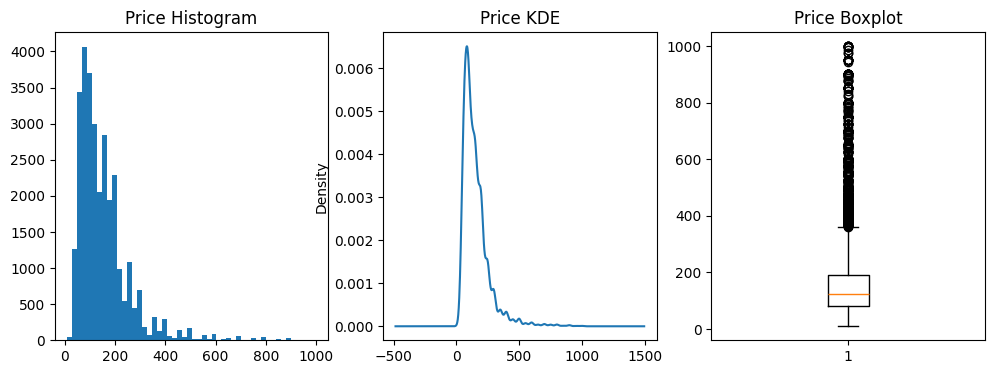

count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64


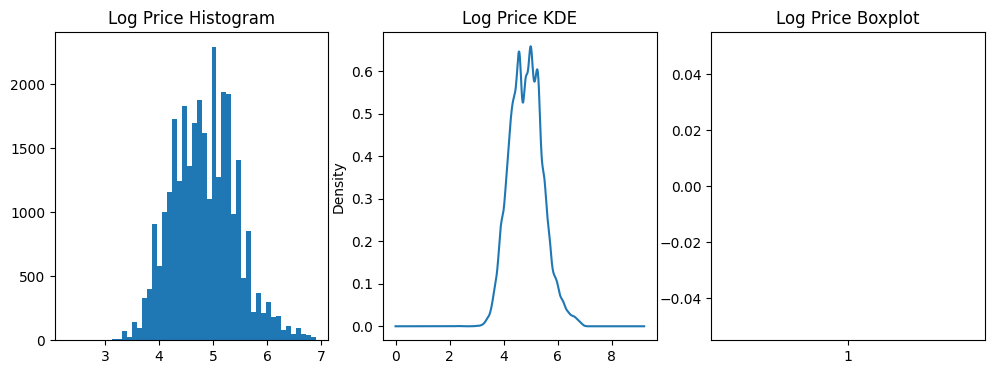

count    30297.000000
mean         4.845370
std          0.596999
min          2.302585
25%          4.382027
50%          4.828314
75%          5.257495
max          6.906755
Name: price_log, dtype: float64


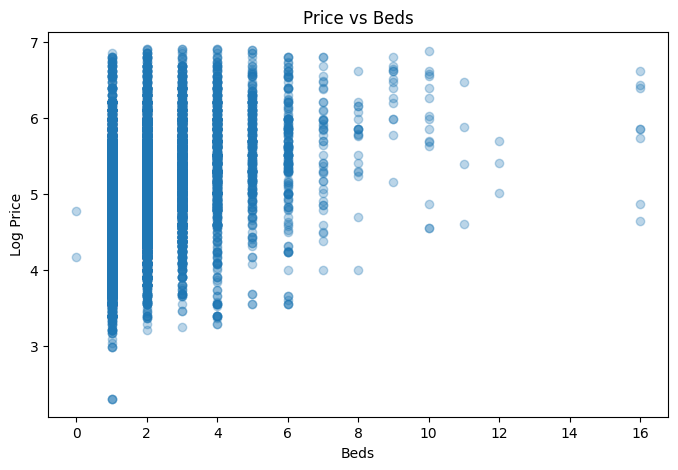

        count        mean         std    min     25%    50%     75%    max
Beds                                                                      
0.0       2.0   92.000000   38.183766   65.0   78.50   92.0  105.50  119.0
1.0   20307.0  124.757670   75.685752   10.0   75.00  100.0  155.00  950.0
2.0    6561.0  186.702332  115.044205   25.0  115.00  160.0  225.00  999.0
3.0    2029.0  234.928043  142.288189   26.0  140.00  200.0  299.00  999.0
4.0     766.0  280.554830  175.512312   27.0  150.00  240.0  363.75  999.0
5.0     274.0  322.000000  190.319415   35.0  186.00  285.0  425.00  995.0
6.0     166.0  316.313253  201.157585   35.0  183.75  271.0  399.00  900.0
7.0      45.0  341.377778  220.116631   55.0  177.00  300.0  445.00  900.0
8.0      20.0  331.850000  155.652202   55.0  218.75  339.5  408.75  750.0
9.0      14.0  587.142857  208.351721  175.0  423.75  625.0  750.00  900.0
10.0     15.0  442.200000  263.926992   95.0  287.00  400.0  650.00  975.0
11.0      4.0  332.250000

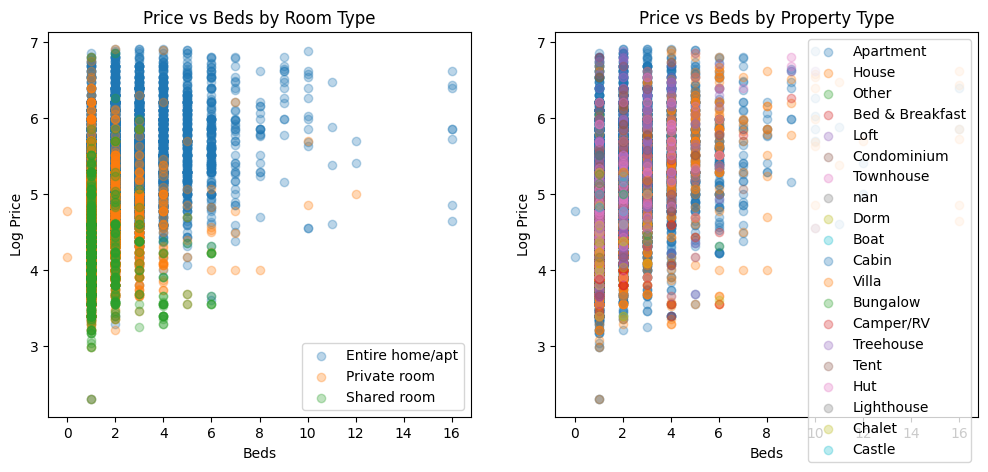


By Room Type:
                   count        mean         std   min    25%    50%    75%  \
Room Type                                                                     
Entire home/apt  16855.0  204.061525  116.531136  10.0  135.0  175.0  239.0   
Private room     12599.0   90.663227   47.914195  10.0   65.0   80.0  100.0   
Shared room        843.0   76.553974   65.756210  10.0   45.0   60.0   85.0   

                   max  
Room Type               
Entire home/apt  999.0  
Private room     999.0  
Shared room      950.0  

By Property Type:
                   count        mean         std    min     25%    50%  \
Property Type                                                            
Apartment        26975.0  153.863170  104.112805   10.0   85.00  129.0   
Bed & Breakfast    180.0  106.572222   84.701977   30.0   65.00   87.5   
Boat                 8.0  153.625000   49.231051  100.0  120.00  137.5   
Bungalow             4.0  150.750000   46.464144   87.0  133.50  160.5   
C

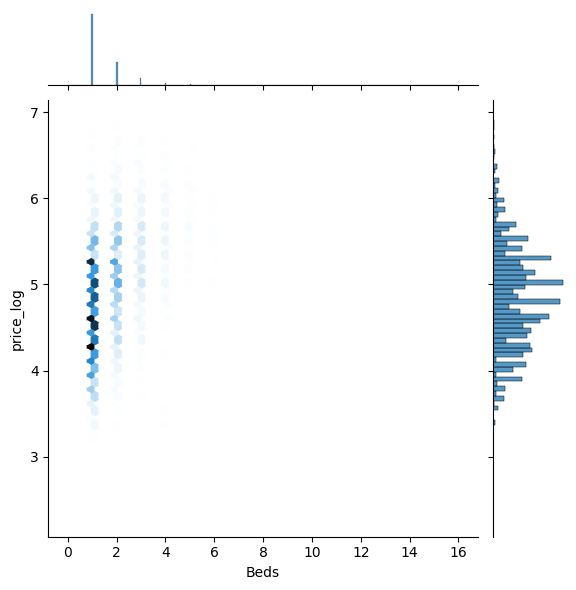

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Claude Sonnet 4.5 Used to Clean up and Troubleshoot

# 1. load data
df = pd.read_csv('/airbnb_hw.csv')

# 2. dimensions and first rows
print(df.shape)
print(df.columns)
print(df.head())
# 25209 rows, bunch of columns

# 3. cross tab room type and property type
print(pd.crosstab(df['Room Type'], df['Property Type']))
# private rooms more common for: Apartment, House, Townhouse, Condominium

# 4. price stats
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(df['Price'].dropna(), bins=50)
plt.title('Price Histogram')

plt.subplot(1, 3, 2)
df['Price'].dropna().plot(kind='kde')
plt.title('Price KDE')

plt.subplot(1, 3, 3)
plt.boxplot(df['Price'].dropna())
plt.title('Price Boxplot')
plt.show()

print(df['Price'].describe())
# super skewed, tons of outliers, badly scaled

# log transform
df['price_log'] = np.log(df['Price'])

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(df['price_log'], bins=50)
plt.title('Log Price Histogram')

plt.subplot(1, 3, 2)
df['price_log'].plot(kind='kde')
plt.title('Log Price KDE')

plt.subplot(1, 3, 3)
plt.boxplot(df['price_log'])
plt.title('Log Price Boxplot')
plt.show()

print(df['price_log'].describe())
# way better, more normal looking

# 5. scatterplot price_log vs beds
plt.figure(figsize=(8, 5))
plt.scatter(df['Beds'], df['price_log'], alpha=0.3)
plt.xlabel('Beds')
plt.ylabel('Log Price')
plt.title('Price vs Beds')
plt.show()
# positive relationship, more beds = higher price

print(df.groupby('Beds')['Price'].describe())
# mean and std both increase with more beds

# 6. scatterplot colored by room type
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for rtype in df['Room Type'].unique():
    subset = df[df['Room Type'] == rtype]
    plt.scatter(subset['Beds'], subset['price_log'], alpha=0.3, label=rtype)
plt.xlabel('Beds')
plt.ylabel('Log Price')
plt.title('Price vs Beds by Room Type')
plt.legend()

plt.subplot(1, 2, 2)
for ptype in df['Property Type'].unique():
    subset = df[df['Property Type'] == ptype]
    plt.scatter(subset['Beds'], subset['price_log'], alpha=0.3, label=ptype)
plt.xlabel('Beds')
plt.ylabel('Log Price')
plt.title('Price vs Beds by Property Type')
plt.legend()
plt.show()

print("\nBy Room Type:")
print(df.groupby('Room Type')['Price'].describe())

print("\nBy Property Type:")
print(df.groupby('Property Type')['Price'].describe())
# entire home/apt highest prices
# boat has highest std dev
# median better than mean bc of outliers and skew

# 7. jointplot with hexbin
sns.jointplot(data=df, x='Beds', y='price_log', kind='hex')
plt.show()
# most data concentrated at low bed counts (1-3 beds), previous scatter plots make it look more spread out than it is
# tons of overlap we couldn't see before

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

(623, 10)
Index(['Month',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)',
       'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)',
       'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Active Well Service Rig Count (Number of Rigs)'],
      dtype='object')
Month                                                                                          object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)              

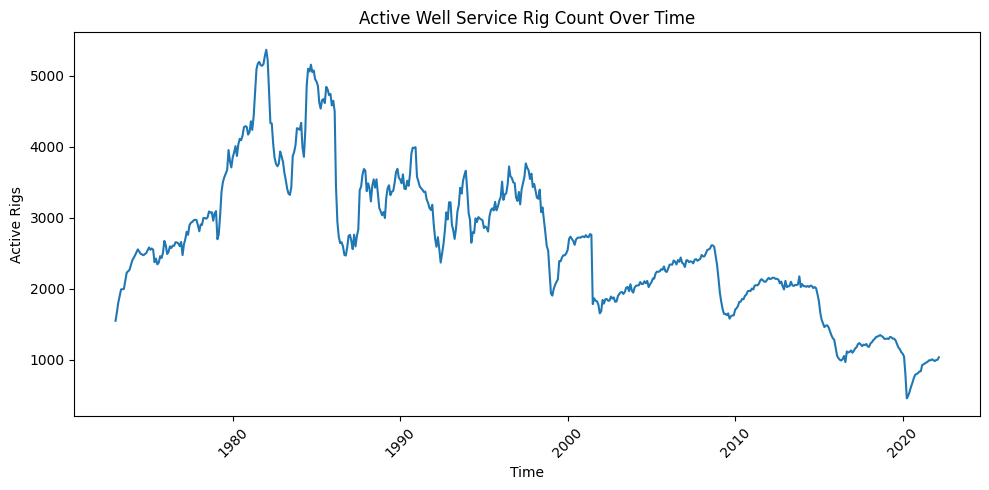

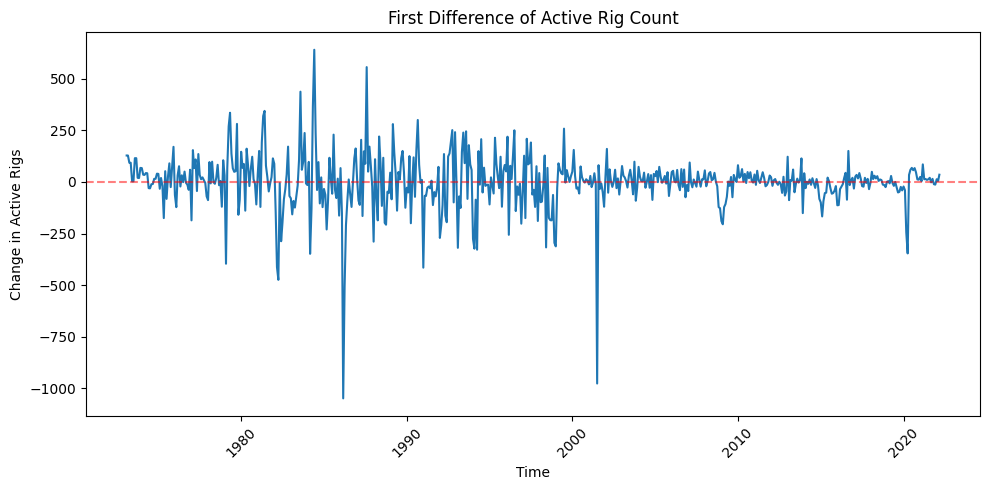

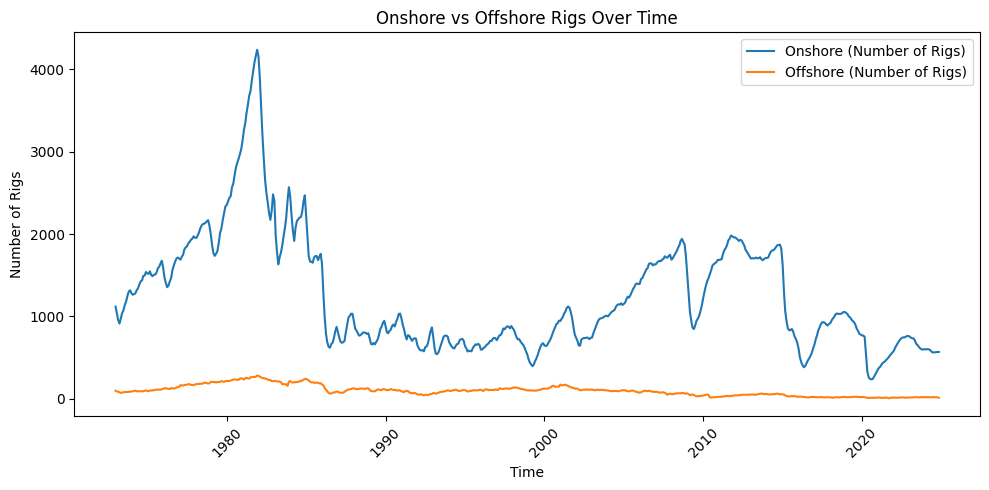

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Claude Sonnet 4.5 Used to Clean up and Troubleshoot

# 1. load and examine data
df = pd.read_csv('/drilling_rigs.csv')

print(df.shape)
print(df.columns)
print(df.dtypes)
print(df.head())
#  k

# convert active rig count to numeric
df['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(df['Active Well Service Rig Count (Number of Rigs)'], errors='coerce')

# 2. convert month to datetime
df['time'] = pd.to_datetime(df['Month'], format='mixed')

# 3. line plot of active well service rig count
plt.figure(figsize=(10, 5))
plt.plot(df['time'], df['Active Well Service Rig Count (Number of Rigs)'])
plt.xlabel('Time')
plt.ylabel('Active Rigs')
plt.title('Active Well Service Rig Count Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# general upward trend with some fluctuations

# 4. first difference
df['rig_diff'] = df['Active Well Service Rig Count (Number of Rigs)'].diff()

plt.figure(figsize=(10, 5))
plt.plot(df['time'], df['rig_diff'])
plt.xlabel('Time')
plt.ylabel('Change in Active Rigs')
plt.title('First Difference of Active Rig Count')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# volatility in changes, some big spikes and drops

# 5. melt onshore/offshore columns (first two columns after Month)
df_melted = pd.melt(df, id_vars=['time'],
                    value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
                                'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'],
                    var_name='Type', value_name='Count')

plt.figure(figsize=(10, 5))
for rig_type in df_melted['Type'].unique():
    subset = df_melted[df_melted['Type'] == rig_type]
    plt.plot(subset['time'], subset['Count'], label=rig_type.split(',')[1].strip())
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.title('Onshore vs Offshore Rigs Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# onshore way higher than offshore